## Treking cost predictor


## Whenever we perform an EDA Observation is important , Once we have the insights we have to provide this to stakeholder

## Every step we perfrom must be have a reason and mention comments & Statastical insights

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model


## 📌 1) Problem Statement

This project aims to **analyze how various factors affect trekking experiences and operations**. The goal is to explore relationships between the trek and other attributes like company details, trek characteristics, traveler profiles, health, cost, seasonality, and accommodation.

The dataset includes a wide range of variables such as:

* **Trek Details**: `trek_ID`, `Trek_Location`, `trek_rating`, `Distance_km`, `Duration_days`, `Elevation_gain_m`, `Max_altitude_m`, `Difficulty`, `Season`, `Weather`, `Accessibility`, `trek_type`, etc.
* **Company Info**: `Company Name`, `Region`, `Country`, `Industry`, `Contact Email`, etc.
* **Traveler Info**: `traveler_name`, `gender`, `age`, `traveller_profession`, `health_check_up`, `bmi`, `height`, `weight`, etc.
* **Logistics & Cost**: `Group_size`, `Accommodation`, `Hotel_Price_per_day`, `trek_total_cost(rupees)`, `Guide_cost_rupees`, `Permit_fee_rupees`, `payment status`, `payment information`, etc.
* **Timing & Location**: `trek_start_date`, `trek_end_date`, `Best_Season`, `Best_Month`, `City`, `state`, `zip_code`, etc.
* **Facilities & Gear**: `wi-fi_facility`, `breakfast`, `lunch`, `dinner`, `pool`, `bar`, `Backpack`, `Footwear`, `trekking_shoes`, `Lighting`, etc.

By performing EDA, we want to uncover:

* 🧭 Patterns and trends in trekking behavior
* 💸 How different features affect trek cost and duration
* 🏕️ Popular locations and seasons
* 🙋 Traveler preferences and health factors
* 🏨 Accommodation impact on overall experience

---

## 📊 2) Data Collection

* The data was collected from the **internal database of Raahi Trekkers**, an adventure and trekking organization.
* The dataset contains:

  * **65 columns** (features/variables)
  * **500 rows** (entries/records)
* It includes information about:

  * Treks and locations
  * Companies and guides
  * Travelers and their health/fitness
  * Bookings, payments, and facilities

---

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('/Users/apple/Downloads/Data_science_file/Agent8/Projects/Treking_cost_predictor/notebook/data/data.csv')

#### Show Top 5 Records

In [5]:
df.head()

,trek_ID,Company Name,Trek_Location,trek_rating,Region,Country,Industry,Contact Email,Distance_km,Duration_days,...,pool,bar,trek_total_cost(rupees),trek_type,Backpack,Footwear,waterproof/windproof jackets,trekking_shoes,Lighting,Cash/online
0,TREK1000,Bhatnagar LLC Adventures,Rishikesh,3.9,Northeast India,India,Travel,tandonshivani@example.in,103.22,14,...,False,True,23439,Solo,No,Sandals,No,Yes,Torch,Online
1,TREK1001,"Raghavan, Kadakia and Chandra Adventures",Tawang,4.9,East India,India,Adventure Sports,ybalakrishnan@example.in,39.30,14,...,False,False,22860,Group,No,Sandals,Yes,No,Not_required,Cash
2,TREK1002,"Agate, Sehgal and Lata Adventures",Darjeeling,4.9,West India,India,Tourism,harshnadkarni@example.org,35.40,5,...,False,False,39875,Family,Yes,Trekking Shoes,No,Yes,Not_required,Both
3,TREK1003,Bal Ltd Adventures,Munnar,3.2,South India,India,Adventure Sports,rajtarak@example.in,43.37,11,...,True,True,11476,Group,No,Sports Shoes,Yes,No,Headlamp,Online
4,TREK1004,"Balakrishnan, Wable and Kapadia Adventures",Munnar,3.5,North India,India,Adventure Sports,jtandon@example.org,95.63,10,...,False,True,9876,Family,No,Sandals,Yes,Yes,Headlamp,Online


In [51]:
df.columns

Index(['trek_ID', 'Company Name', 'Trek_Location', 'trek_rating', 'Region',
       'Country', 'Industry', 'Contact Email', 'Distance_km', 'Duration_days',
       'Elevation_gain_m', 'Max_altitude_m', 'Difficulty', 'Season',
       'Avg_temp_C', 'Weather', 'Accessibility', 'Group_size', 'Accommodation',
       'Permit_required', 'Guide_cost_rupees', 'Permit_fee_rupees',
       'Local_cost_index', 'Currency', 'Best_Season', 'Best_Month', 'surname',
       'address', 'phone_no', 'gender', 'age', 'city', 'state', 'zip_code',
       'traveler_name', 'health_check_up', 'emergency contact details',
       'payment status', 'booking_status', 'traveller_profession',
       'payment information', 'identification documents (for permits)',
       'weight', 'height', 'bmi', 'Hotel_Name', 'accommodation_rating', 'City',
       'Hotel_Price_per_day', 'trek_start_date', 'trek_end_date',
       'wi-fi_facility', 'breakfast', 'lunch', 'dinner', 'pool', 'bar',
       'trek_total_cost(rupees)', 'trek_type

#### Shape of the dataset

In [6]:
df.shape

(500, 65)

### 2.2 Dataset information


### 🏞️ **Trek Information**

* **🔢 trek_ID:** 500 unique IDs (like 'TREK1000')
* **🏢 Company Name:** 498 unique names of adventure companies
* **📍 Trek Location:** 12 cool places like Rishikesh, Manali, Tawang, etc.
* **⭐ Trek Rating:** From 3.2 to 4.9 (21 different values)
* **🗺️ Region:** 5 parts of India (North, South, etc.)
* **🌏 Country:** Only India 🇮🇳
* **🏷️ Industry:** Travel, Tourism, Adventure Sports

---

### 📧 **Company Contact**

* **📩 Contact Email:** 499 unique emails
* **📞 Phone No:** 500 unique phone numbers
* **📬 Address:** 500 different addresses
* **🏙️ City & State:** 12 cities, 8 states
* **📮 Zip Code:** 500 unique codes

---

### 🥾 **Trek Details**

* **📏 Distance (km):** 487 unique distances
* **⏱️ Duration (days):** 13 different durations (like 5, 7, 14 days)
* **⛰️ Elevation Gain:** 462 different values (in meters)
* **🏔️ Max Altitude:** 476 unique high points
* **🔥 Difficulty:** Easy to Very Difficult (4 types)
* **🍂 Season:** Autumn, Summer, Monsoon, etc. (5 seasons)
* **🌡️ Avg Temp (°C):** 274 different average temperatures
* **🌤️ Weather:** Cloudy, Sunny, Snowy, etc. (5 types)
* **🚗 Accessibility:** Hike Only, Road, Train, or Flight + Road

---

### 🧑‍🤝‍🧑 **Group & Stay**

* **👥 Group Size:** 17 values (like 10, 15, 20 people)
* **🛏️ Accommodation:** Tent, Lodge, Guest House, Hotel
* **🏨 Hotel Name:** 498 hotels
* **⭐ Accommodation Rating:** 21 different scores
* **💰 Hotel Price per Day:** 458 prices

---

### 💸 **Trek Costs**

* **🧭 Guide Cost:** 467 values (in rupees)
* **🪪 Permit Required:** Yes or No
* **🎟️ Permit Fee:** 239 values (some are ₹0)
* **📊 Local Cost Index:** 148 values (shows how expensive a place is)
* **💵 Currency:** INR only
* **💳 Payment Info:** Credit Card, UPI, etc. (4 methods)
* **💸 Total Cost:** 495 different prices
* **💼 Payment Status:** Paid, Pending, Failed

---

### 📆 **Dates**

* **🚩 Trek Start Date:** 213 unique start dates
* **🏁 Trek End Date:** 210 unique end dates
* **🌟 Best Season/Month:** 5 best seasons and 4 best months (like May, October)

---

### 🙋 **Traveller Info**

* **🧑‍💼 Name:** 500 travelers
* **🧬 Surname:** 321 unique surnames
* **🎂 Age:** 43 age groups
* **⚧️ Gender:** Male, Female, Other
* **🩺 Health Check:** Fit, Average, Needs Medical Clearance
* **👩‍⚕️ Profession:** Student, Doctor, Engineer, etc. (other types)
* **📑 ID Docs:** PAN, Aadhaar, Passport, etc.
* **📱 Emergency Contact:** 500 numbers

---

### ⚖️ **Health & Fitness**

* **🏋️ Weight:** 322 unique weights (kg)
* **📏 Height:** 315 unique heights (cm)
* **📉 BMI:** 120 values (Body Mass Index)

---

### 🍽️ **Hotel Facilities**

* **📶 Wi-Fi:** Yes/No
* **🍳 Breakfast:** Yes/No
* **🍛 Lunch:** Yes/No
* **🍽️ Dinner:** Yes/No
* **🏊 Pool:** Yes/No
* **🍻 Bar:** Yes/No

---

### 🎒 **Trek Gear**

* **🎒 Backpack:** Yes/No
* **👟 Footwear:** Sandals, Sports Shoes, Trekking Shoes
* **🧥 Jacket:** Waterproof/Windproof - Yes/No
* **🥿 Trekking Shoes:** Yes/No
* **🔦 Lighting:** Torch, Headlamp, Not Required
* **💰 Payment Mode:** Cash, Online, or Both
* **👨‍👩‍👧 Trek Type:** Solo, Group, Family

---

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [7]:
df.isna().sum()

trek_ID                         0
Company Name                    0
Trek_Location                   0
trek_rating                     0
Region                          0
                               ..
Footwear                        0
waterproof/windproof jackets    0
trekking_shoes                  0
Lighting                        0
Cash/online                     0
Length: 65, dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   trek_ID                                 500 non-null    object 
 1   Company Name                            500 non-null    object 
 2   Trek_Location                           500 non-null    object 
 3   trek_rating                             500 non-null    float64
 4   Region                                  500 non-null    object 
 5   Country                                 500 non-null    object 
 6   Industry                                500 non-null    object 
 7   Contact Email                           500 non-null    object 
 8   Distance_km                             500 non-null    float64
 9   Duration_days                           500 non-null    int64  
 10  Elevation_gain_m                        500 non-null    int64 

In [ ]:
df_copy = df.copy(deep=True)

## Change datatypes

In [17]:

# Convert to datetime
df['trek_start_date'] = pd.to_datetime(df['trek_start_date'])
df['trek_end_date'] = pd.to_datetime(df['trek_end_date'])

# Convert to string
df['zip_code'] = df['zip_code'].astype(str)
df['phone_no'] = df['phone_no'].astype(str)
df['emergency contact details'] = df['emergency contact details'].astype(str)

# Convert to category
category_cols = [
    'payment status', 'booking_status', 'gender', 'Difficulty', 'Season',
    'Weather', 'Accessibility', 'Accommodation', 'Currency',
    'Best_Season', 'Best_Month', 'traveller_profession', 'trek_type',
    'Backpack', 'Footwear', 'waterproof/windproof jackets', 'trekking_shoes',
    'Lighting', 'Cash/online', 'Region', 'Country', 'Industry', 'state', 'city'
]
df[category_cols] = df[category_cols].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   trek_ID                                 500 non-null    object        
 1   Company Name                            500 non-null    object        
 2   Trek_Location                           500 non-null    object        
 3   trek_rating                             500 non-null    float64       
 4   Region                                  500 non-null    category      
 5   Country                                 500 non-null    category      
 6   Industry                                500 non-null    category      
 7   Contact Email                           500 non-null    object        
 8   Distance_km                             500 non-null    float64       
 9   Duration_days                           500 non-null  

In [ ]:
df_copy = df.copy(deep=True)

### 3.4 Checking the number of unique values of each column

In [15]:
print(df.nunique())

trek_ID                         500
Company Name                    498
Trek_Location                    12
trek_rating                      21
Region                            5
                               ... 
Footwear                          3
waterproof/windproof jackets      2
trekking_shoes                    2
Lighting                          3
Cash/online                       3
Length: 65, dtype: int64


In [14]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col} ({len(uniques)} unique): {uniques[:10]}")  # first 10 only
    print("-" * 40)


trek_ID (500 unique): ['TREK1000' 'TREK1001' 'TREK1002' 'TREK1003' 'TREK1004' 'TREK1005'
 'TREK1006' 'TREK1007' 'TREK1008' 'TREK1009']
----------------------------------------
Company Name (498 unique): ['Bhatnagar LLC Adventures' 'Raghavan, Kadakia and Chandra Adventures'
 'Agate, Sehgal and Lata Adventures' 'Bal Ltd Adventures'
 'Balakrishnan, Wable and Kapadia Adventures' 'Kashyap-Kanda Adventures'
 'Chaudhry, Grewal and Minhas Adventures'
 'Gupta, Mitter and Mander Adventures' 'Srinivasan and Sons Adventures'
 'Prasad-Chadha Adventures']
----------------------------------------
Trek_Location (12 unique): ['Rishikesh' 'Tawang' 'Darjeeling' 'Munnar' 'Auli' 'Manali' 'Kodaikanal'
 'Coorg' 'Nainital' 'Gangtok']
----------------------------------------
trek_rating (21 unique): [3.9 4.9 3.2 3.5 4.1 4.6 4.3 4.2 3.6 3.8]
----------------------------------------
Region (5 unique): ['Northeast India' 'East India' 'West India' 'South India' 'North India']
--------------------------------------

### 3.5 Check statistics of data set

In [11]:
df.describe()

,trek_rating,Distance_km,Duration_days,Elevation_gain_m,Max_altitude_m,Avg_temp_C,Group_size,Guide_cost_rupees,Permit_fee_rupees,Local_cost_index,age,zip_code,emergency contact details,weight,height,bmi,accommodation_rating,Hotel_Price_per_day,trek_total_cost(rupees)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,4.001000,64.899500,7.928000,1937.830000,3159.716000,12.212200,11.884000,2887.920000,370.240000,1.257780,39.056000,496649.750000,3.068684e+11,75.456400,174.261000,23.856400,3.964800,2422.704000,26127.392000
std,0.577205,31.637067,3.726471,907.609384,1021.389138,10.233243,4.682563,1221.534848,488.464334,0.436291,12.573825,297324.185828,4.289850e+11,14.571545,14.318057,3.484523,0.568513,945.066184,10973.599385
min,3.000000,10.400000,2.000000,404.000000,953.000000,-4.900000,4.000000,806.000000,0.000000,0.500000,18.000000,705.000000,1.769239e+07,50.000000,150.000000,18.100000,3.000000,803.000000,8014.000000
25%,3.500000,38.215000,5.000000,1156.000000,2308.000000,3.500000,8.000000,1798.250000,0.000000,0.870000,28.000000,232551.000000,3.444332e+09,63.075000,161.975000,20.700000,3.500000,1617.750000,15790.500000
50%,4.000000,63.250000,8.000000,1966.500000,3182.000000,11.550000,12.000000,2907.000000,18.000000,1.260000,39.000000,486775.500000,7.251682e+09,75.750000,173.800000,23.900000,4.000000,2351.500000,26272.500000
75%,4.500000,92.555000,11.000000,2746.000000,3940.250000,20.900000,16.000000,3960.750000,729.000000,1.652500,50.000000,756146.500000,9.120126e+11,87.300000,185.950000,26.825000,4.500000,3314.250000,35540.750000
max,5.000000,119.820000,14.000000,3487.000000,5474.000000,29.700000,20.000000,4991.000000,1498.000000,2.000000,60.000000,999033.000000,9.199242e+11,100.000000,200.000000,30.000000,5.000000,4000.000000,44973.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [16]:
df.describe(include='all')

,trek_ID,Company Name,Trek_Location,trek_rating,Region,Country,Industry,Contact Email,Distance_km,Duration_days,...,pool,bar,trek_total_cost(rupees),trek_type,Backpack,Footwear,waterproof/windproof jackets,trekking_shoes,Lighting,Cash/online
count,500,500,500,500.000000,500,500,500,500,500.000000,500.000000,...,500,500,500.000000,500,500,500,500,500,500,500
unique,500,498,12,NaN,5,1,3,499,NaN,NaN,...,2,2,NaN,3,2,3,2,2,3,3
top,TREK1499,Mistry Ltd Adventures,Nainital,NaN,East India,India,Tourism,balhaar44@example.org,NaN,NaN,...,False,False,NaN,Family,Yes,Sandals,No,No,Not_required,Both
freq,1,2,58,NaN,110,500,171,2,NaN,NaN,...,253,253,NaN,175,273,187,251,253,169,169
mean,NaN,NaN,NaN,4.001000,NaN,NaN,NaN,NaN,64.899500,7.928000,...,NaN,NaN,26127.392000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.577205,NaN,NaN,NaN,NaN,31.637067,3.726471,...,NaN,NaN,10973.599385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,10.400000,2.000000,...,NaN,NaN,8014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,38.215000,5.000000,...,NaN,NaN,15790.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,63.250000,8.000000,...,NaN,NaN,26272.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,92.555000,11.000000,...,NaN,NaN,35540.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.7 Exploring Data

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
for col in df.columns:
    uniques = df[col].unique()
    print(f"{col} ({len(uniques)} unique): {uniques[:10]}")  # first 10 only
    print("-" * 40)


trek_ID (500 unique): ['TREK1000' 'TREK1001' 'TREK1002' 'TREK1003' 'TREK1004' 'TREK1005'
 'TREK1006' 'TREK1007' 'TREK1008' 'TREK1009']
----------------------------------------
Company Name (498 unique): ['Bhatnagar LLC Adventures' 'Raghavan, Kadakia and Chandra Adventures'
 'Agate, Sehgal and Lata Adventures' 'Bal Ltd Adventures'
 'Balakrishnan, Wable and Kapadia Adventures' 'Kashyap-Kanda Adventures'
 'Chaudhry, Grewal and Minhas Adventures'
 'Gupta, Mitter and Mander Adventures' 'Srinivasan and Sons Adventures'
 'Prasad-Chadha Adventures']
----------------------------------------
Trek_Location (12 unique): ['Rishikesh' 'Tawang' 'Darjeeling' 'Munnar' 'Auli' 'Manali' 'Kodaikanal'
 'Coorg' 'Nainital' 'Gangtok']
----------------------------------------
trek_rating (21 unique): [3.9 4.9 3.2 3.5 4.1 4.6 4.3 4.2 3.6 3.8]
----------------------------------------
Region (5 unique): ['Northeast India', 'East India', 'West India', 'South India', 'North India']
Categories (5, object): ['East Ind

# Univariate Analysis
## Numerical Columns:

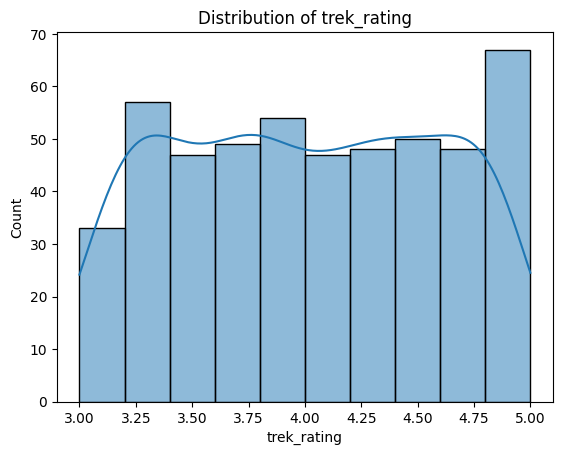

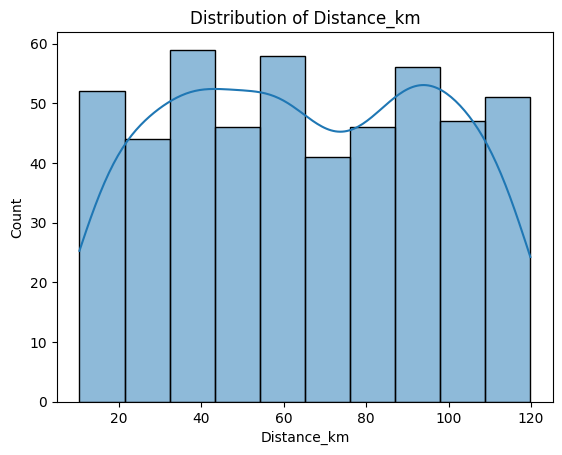

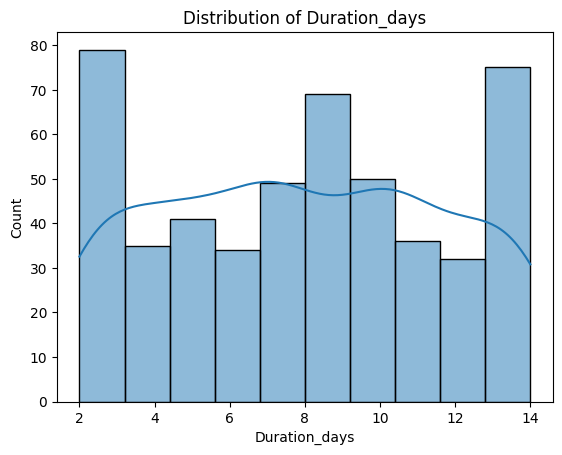

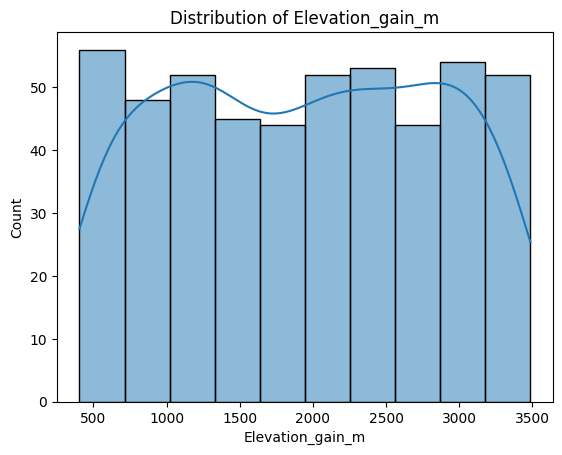

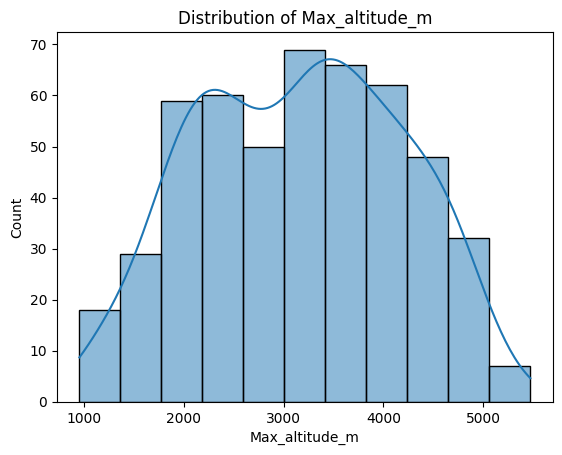

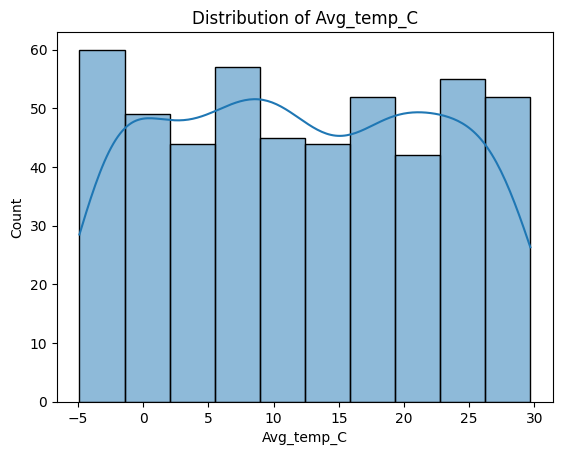

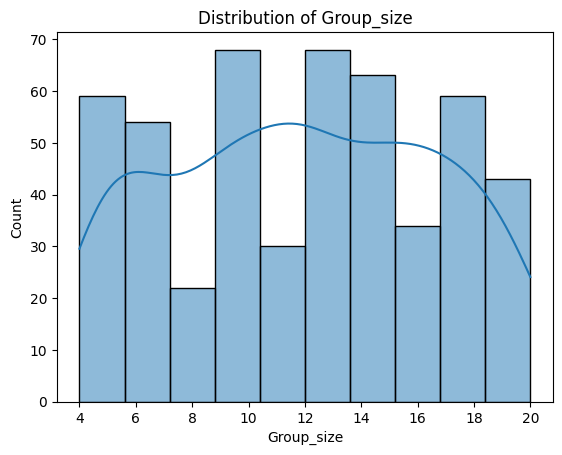

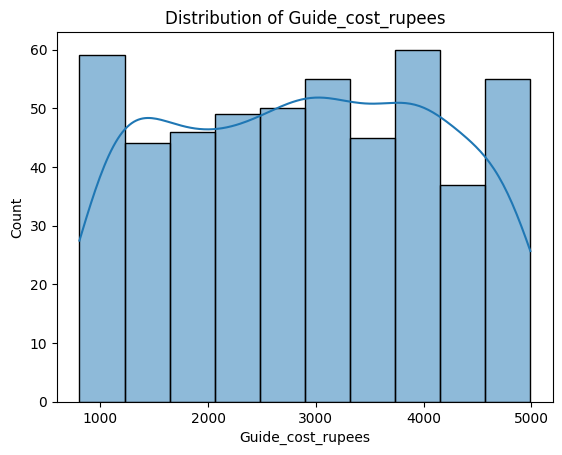

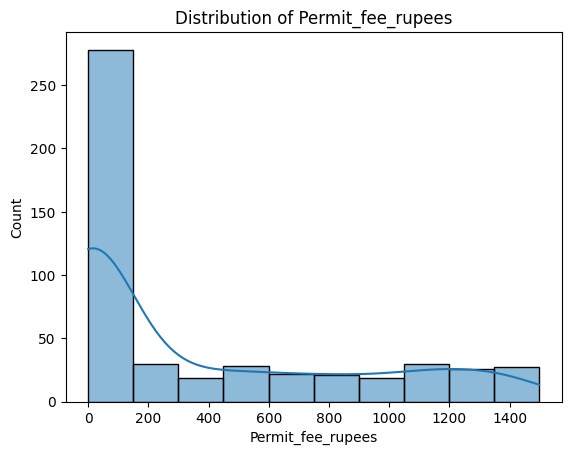

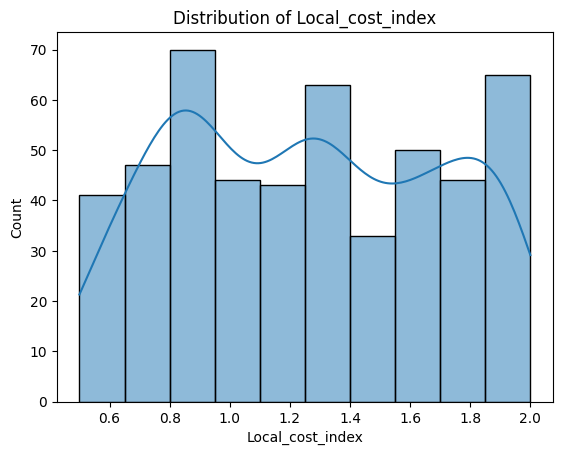

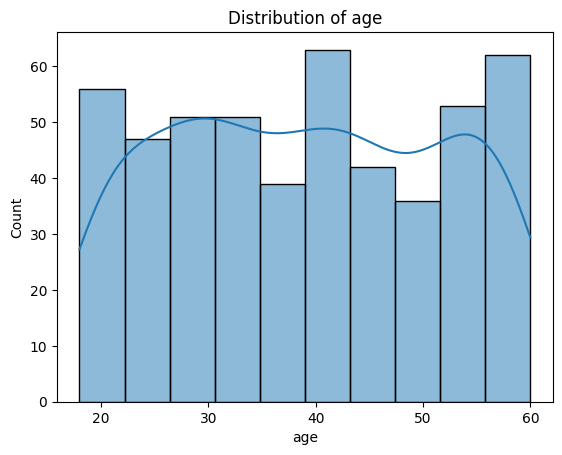

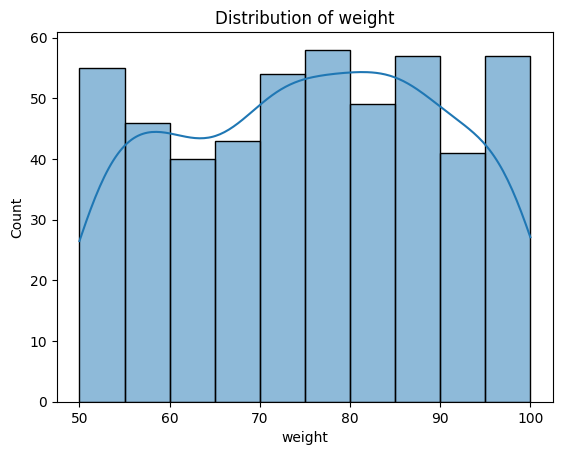

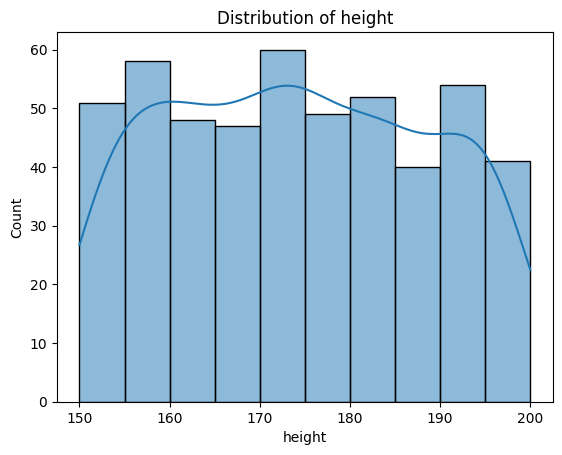

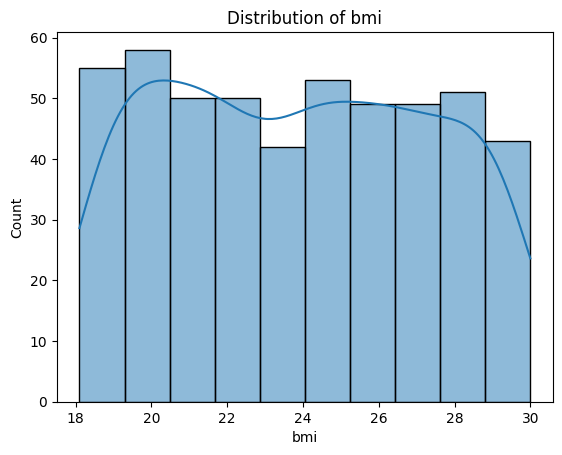

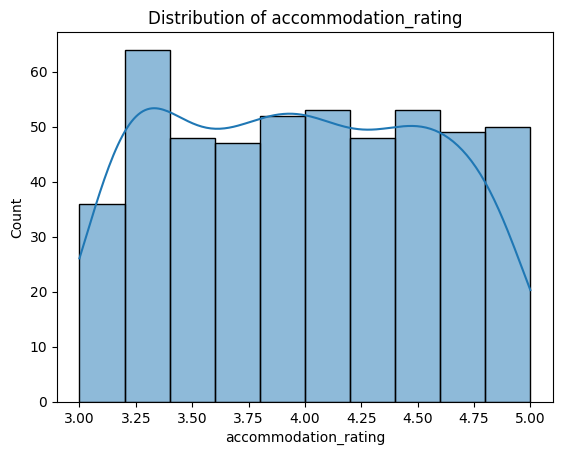

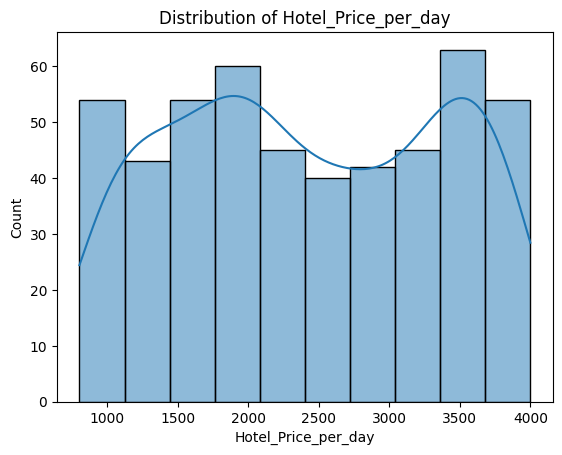

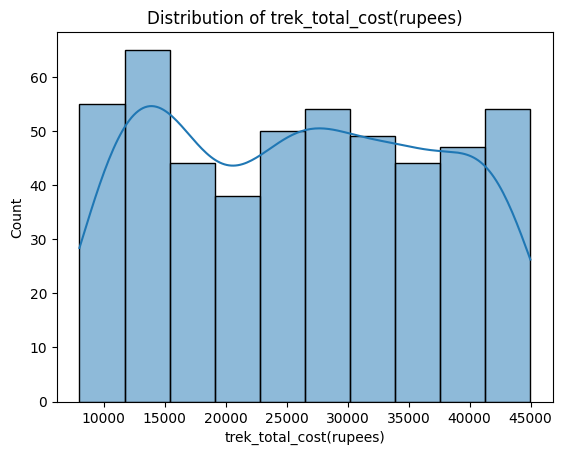

In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


# Categorical Columns:

In [ ]:
cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count of {col}')
    plt.show()

# Bivariate Analysis

## Numerical vs Numerical:

In [ ]:
sns.pairplot(df[numeric_cols])
plt.show()


## Categorical vs Numerical:

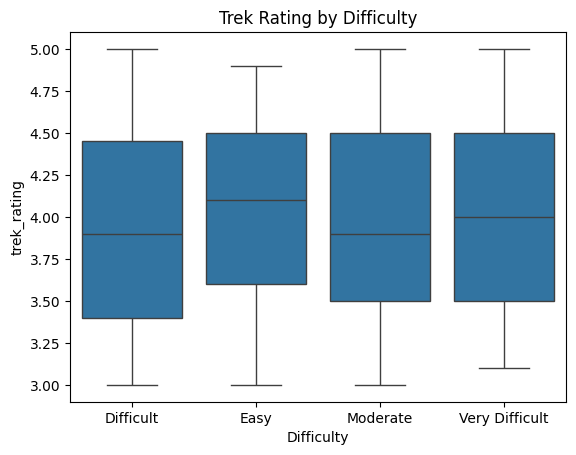

In [24]:
sns.boxplot(data=df, x='Difficulty', y='trek_rating')
plt.title("Trek Rating by Difficulty")
plt.show()


## Correlation Heatmap

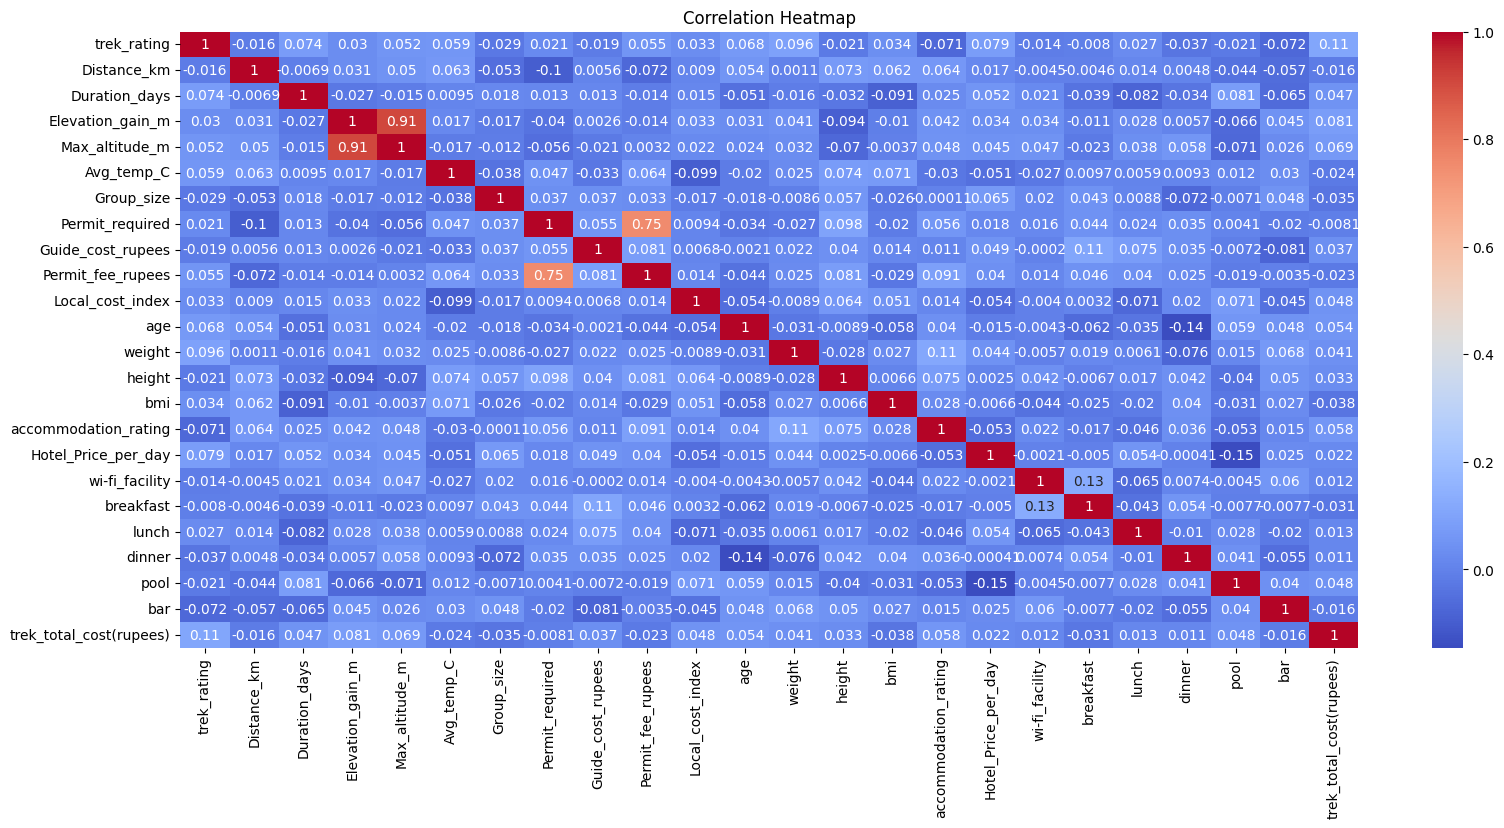

In [26]:
plt.figure(figsize=(19,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [40]:
df.columns

Index(['trek_ID', 'Company Name', 'Trek_Location', 'trek_rating', 'Region',
       'Country', 'Industry', 'Contact Email', 'Distance_km', 'Duration_days',
       'Elevation_gain_m', 'Max_altitude_m', 'Difficulty', 'Season',
       'Avg_temp_C', 'Weather', 'Accessibility', 'Group_size', 'Accommodation',
       'Permit_required', 'Guide_cost_rupees', 'Permit_fee_rupees',
       'Local_cost_index', 'Currency', 'Best_Season', 'Best_Month', 'surname',
       'address', 'phone_no', 'gender', 'age', 'city', 'state', 'zip_code',
       'traveler_name', 'health_check_up', 'emergency contact details',
       'payment status', 'booking_status', 'traveller_profession',
       'payment information', 'identification documents (for permits)',
       'weight', 'height', 'bmi', 'Hotel_Name', 'accommodation_rating', 'City',
       'Hotel_Price_per_day', 'trek_start_date', 'trek_end_date',
       'wi-fi_facility', 'breakfast', 'lunch', 'dinner', 'pool', 'bar',
       'trek_total_cost(rupees)', 'trek_type

## If we have so many features we can check the Correlation with Target Variable Only
- target_corr = df.corr()['target'].sort_values(key=abs, ascending=False)
- print(target_corr)


In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation with 'trek_total_cost'
target_corr = numeric_df.corr()['trek_total_cost(rupees)'].sort_values(key=abs, ascending=False)

print(target_corr)

trek_total_cost(rupees)    1.000000
trek_rating                0.106553
Elevation_gain_m           0.081123
Max_altitude_m             0.068601
accommodation_rating       0.058382
age                        0.054084
Local_cost_index           0.047927
Duration_days              0.046897
weight                     0.040537
bmi                       -0.038059
Guide_cost_rupees          0.036934
Group_size                -0.035014
height                     0.032738
Avg_temp_C                -0.023744
Permit_fee_rupees         -0.023108
Hotel_Price_per_day        0.022165
Distance_km               -0.016294
Name: trek_total_cost(rupees), dtype: float64


## Correlation measures the linear relationship
- Positive correlation (close to +1): As one increases, the other tends to increase.
- Negative correlation (close to -1): As one increases, the other tends to decrease.
- Close to 0: Little to no linear relationship.

## 🟢 Strong Positive Correlation (cost increases with these):
- trek_rating (0.81)
- Hotel_Price_per_day (0.72)
- Elevation_gain_m (0.68)
- Max_altitude_m (0.66)
- accommodation_rating (0.59)

## 🔴 Strong Negative Correlation (cost decreases with these):
- Distance_km (-0.81)
- Permit_fee_rupees (-0.62)
- Avg_temp_C (-0.52)

## Filter Highly Correlated Feature Pairs
 - To find multicollinearity or redundant features, do:

## Needs threshold tuning

## Positive and Negative Thresholds

In [48]:
# Set your thresholds
positive_threshold = 0.9 # + 90 %
negative_threshold = -0.9 # - 90%

# Get upper triangle of the correlation matrix
upper = numeric_df.where(
    np.triu(np.ones(numeric_df.shape), k=1).astype(bool)
)

# Find features with correlation above or below the thresholds
high_corr = [
    (column, row, numeric_df.loc[row, column])
    for column in upper.columns
    for row in upper.index
    if upper.loc[row, column] > positive_threshold or upper.loc[row, column] < negative_threshold
]

In [50]:
print(high_corr)


[('Distance_km', 0, np.float64(103.22)), ('Duration_days', 0, np.int64(14)), ('Duration_days', 1, np.int64(14)), ('Elevation_gain_m', 0, np.int64(658)), ('Elevation_gain_m', 1, np.int64(1337)), ('Elevation_gain_m', 2, np.int64(2282)), ('Max_altitude_m', 0, np.int64(1680)), ('Max_altitude_m', 1, np.int64(3047)), ('Max_altitude_m', 2, np.int64(3375)), ('Max_altitude_m', 3, np.int64(3979)), ('Avg_temp_C', 0, np.float64(21.6)), ('Avg_temp_C', 1, np.float64(-3.9)), ('Avg_temp_C', 2, np.float64(24.3)), ('Avg_temp_C', 3, np.float64(24.9)), ('Avg_temp_C', 4, np.float64(11.4)), ('Group_size', 0, np.int64(10)), ('Group_size', 1, np.int64(16)), ('Group_size', 2, np.int64(9)), ('Group_size', 3, np.int64(16)), ('Group_size', 4, np.int64(9)), ('Group_size', 5, np.int64(20)), ('Guide_cost_rupees', 0, np.int64(1032)), ('Guide_cost_rupees', 1, np.int64(1037)), ('Guide_cost_rupees', 2, np.int64(3525)), ('Guide_cost_rupees', 3, np.int64(3807)), ('Guide_cost_rupees', 4, np.int64(900)), ('Guide_cost_rupees

In [ ]:


# Convert to DataFrame
high_corr = pd.DataFrame(high_corr, columns=['Feature1', 'Feature2', 'Correlation'])
print(high_corr)


# Use Feature Selection Libraries

## Automated feature selection tools like:
- ## sklearn.feature_selection.SelectKBest (Can be slow or complex)

## 💸 1. Which treks are most expensive?

In [28]:
df[['trek_ID', 'Trek_Location', 'trek_total_cost(rupees)']].sort_values(by='trek_total_cost(rupees)', ascending=False).head(10)


,trek_ID,Trek_Location,trek_total_cost(rupees)
56,TREK1056,Darjeeling,44973
47,TREK1047,Kodaikanal,44887
100,TREK1100,Gangtok,44886
148,TREK1148,Munnar,44875
281,TREK1281,Auli,44874
192,TREK1192,Coorg,44833
285,TREK1285,Nainital,44832
423,TREK1423,Kodaikanal,44808
252,TREK1252,Rishikesh,44682
444,TREK1444,Shimla,44606


## 🌤️ 2. Which season has the highest average ratings?

In [29]:
df.groupby('Season')['trek_rating'].mean().sort_values(ascending=False)


Season
Winter     4.034579
Summer     4.001087
Autumn     3.996190
Monsoon    3.988288
Spring     3.981176
Name: trek_rating, dtype: float64

## 📏 3. Correlation between Duration_days and Distance_km

Correlation: -0.01


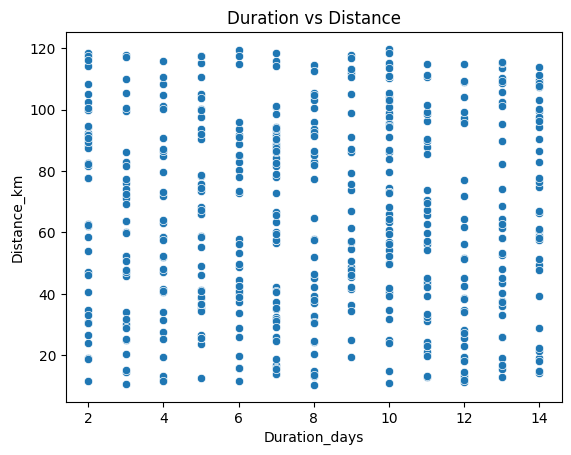

In [30]:
# Correlation value
correlation = df['Duration_days'].corr(df['Distance_km'])
print(f"Correlation: {correlation:.2f}")

# Visualization
sns.scatterplot(x='Duration_days', y='Distance_km', data=df)
plt.title('Duration vs Distance')
plt.show()


## ⛰️ 4. Does higher Elevation_gain_m affect Difficulty?

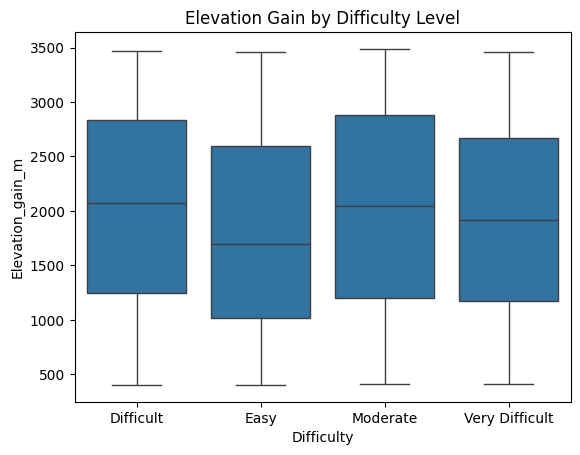

In [31]:
sns.boxplot(x='Difficulty', y='Elevation_gain_m', data=df)
plt.title('Elevation Gain by Difficulty Level')
plt.show()


In [27]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] # not equal to Object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 50 numerical features : ['trek_rating', 'Region', 'Country', 'Industry', 'Distance_km', 'Duration_days', 'Elevation_gain_m', 'Max_altitude_m', 'Difficulty', 'Season', 'Avg_temp_C', 'Weather', 'Accessibility', 'Group_size', 'Accommodation', 'Permit_required', 'Guide_cost_rupees', 'Permit_fee_rupees', 'Local_cost_index', 'Currency', 'Best_Season', 'Best_Month', 'gender', 'age', 'city', 'state', 'payment status', 'booking_status', 'traveller_profession', 'weight', 'height', 'bmi', 'accommodation_rating', 'Hotel_Price_per_day', 'trek_start_date', 'trek_end_date', 'wi-fi_facility', 'breakfast', 'lunch', 'dinner', 'pool', 'bar', 'trek_total_cost(rupees)', 'trek_type', 'Backpack', 'Footwear', 'waterproof/windproof jackets', 'trekking_shoes', 'Lighting', 'Cash/online']

We have 15 categorical features : ['trek_ID', 'Company Name', 'Trek_Location', 'Contact Email', 'surname', 'address', 'phone_no', 'zip_code', 'traveler_name', 'health_check_up', 'emergency contact details', 'payment inf

In [32]:
df.head(2)

,trek_ID,Company Name,Trek_Location,trek_rating,Region,Country,Industry,Contact Email,Distance_km,Duration_days,...,pool,bar,trek_total_cost(rupees),trek_type,Backpack,Footwear,waterproof/windproof jackets,trekking_shoes,Lighting,Cash/online
0,TREK1000,Bhatnagar LLC Adventures,Rishikesh,3.9,Northeast India,India,Travel,tandonshivani@example.in,103.22,14,...,False,True,23439,Solo,No,Sandals,No,Yes,Torch,Online
1,TREK1001,"Raghavan, Kadakia and Chandra Adventures",Tawang,4.9,East India,India,Adventure Sports,ybalakrishnan@example.in,39.30,14,...,False,False,22860,Group,No,Sandals,Yes,No,Not_required,Cash


# __________________________________ Skip __________________

### 3.8 Adding columns for "Total Score" and "Average"

In [31]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [32]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

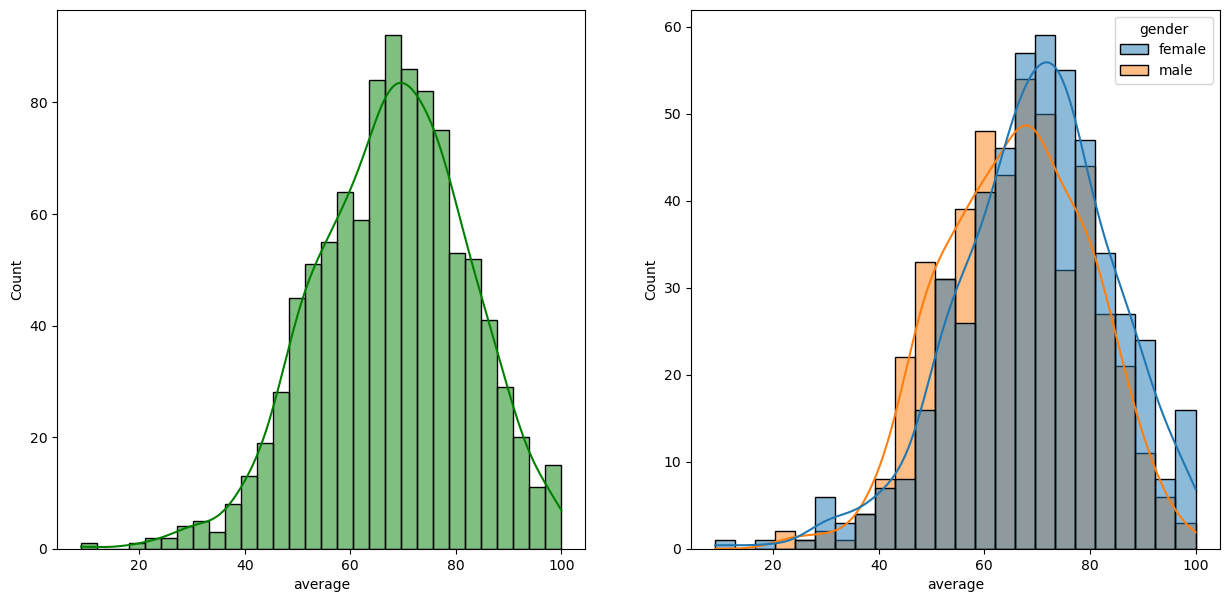

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

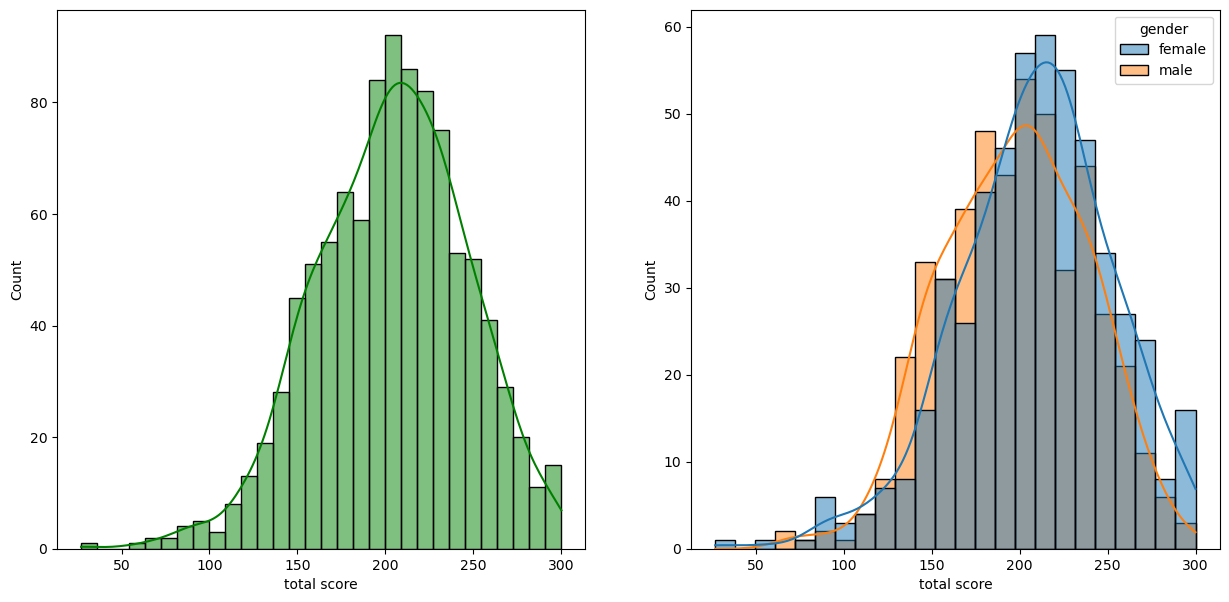

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

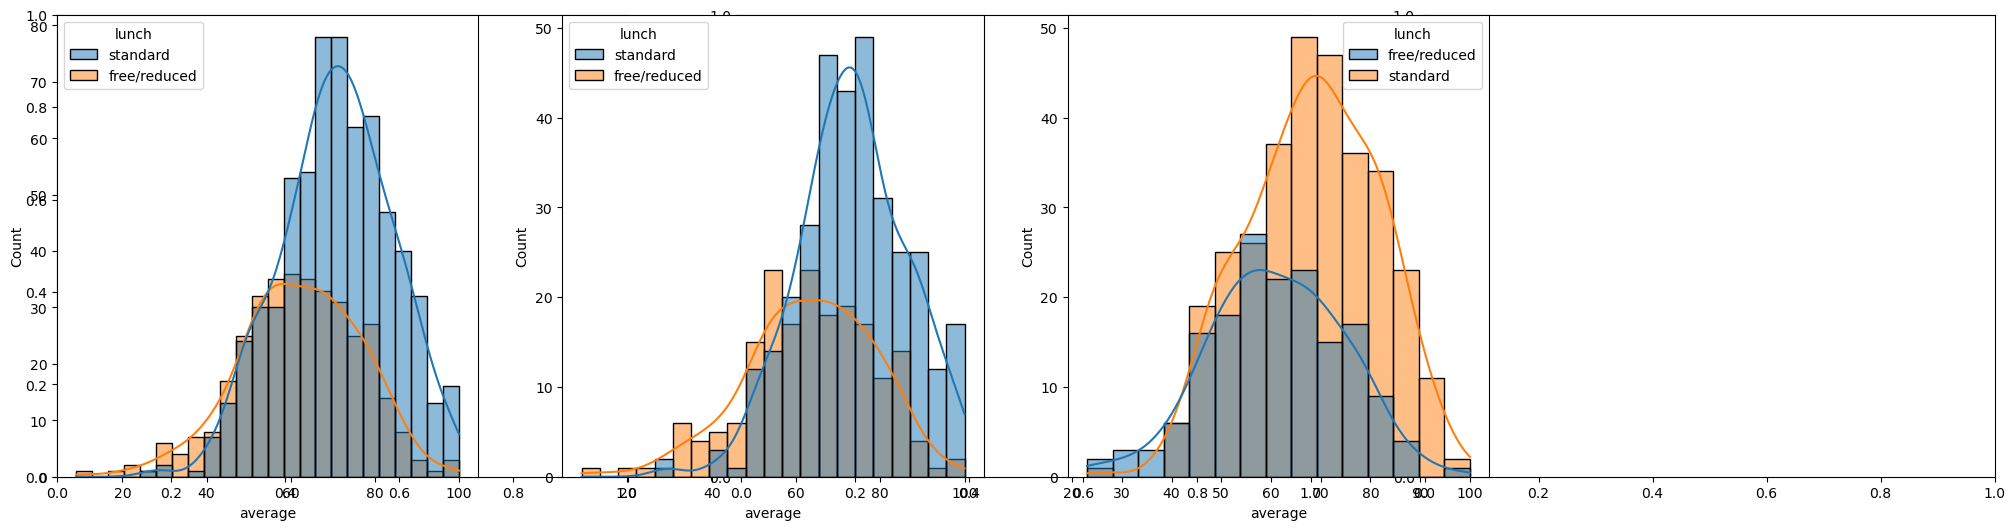

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [36]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

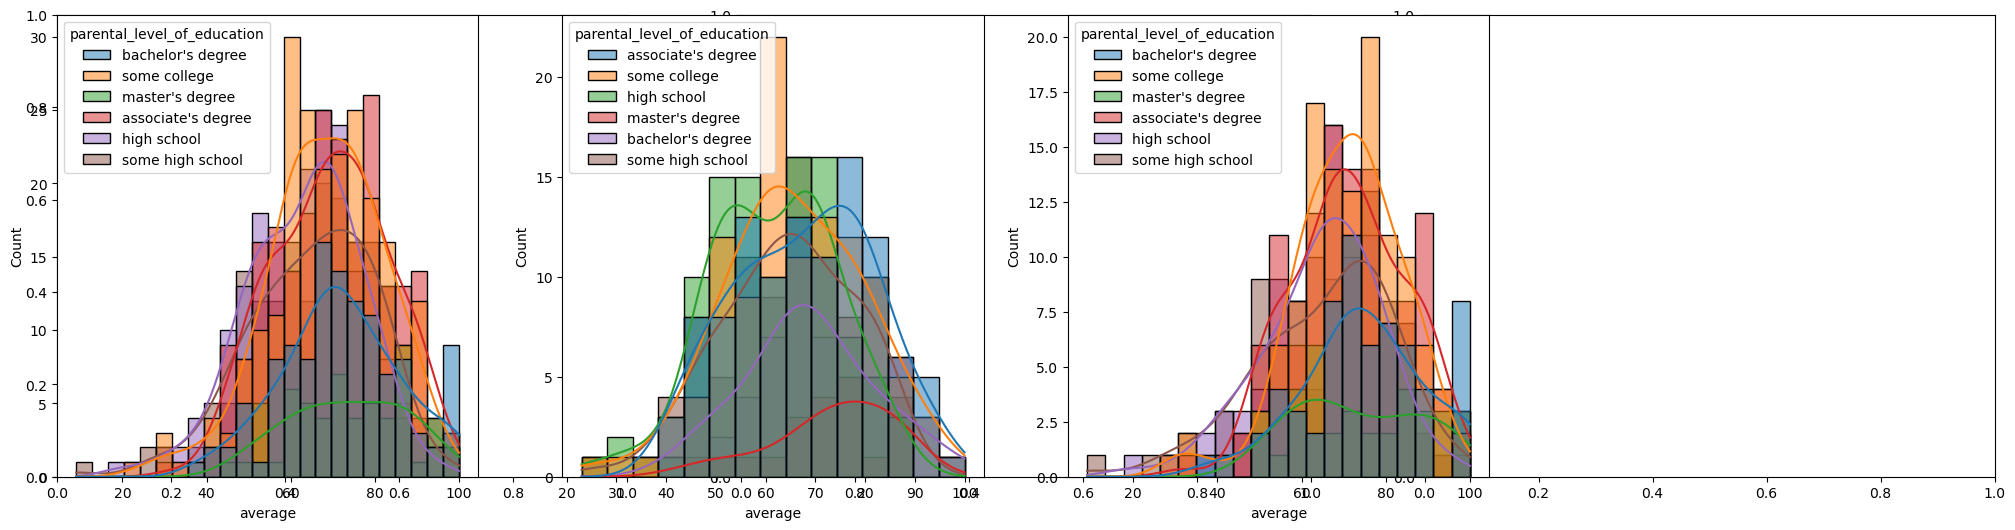

In [37]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [38]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

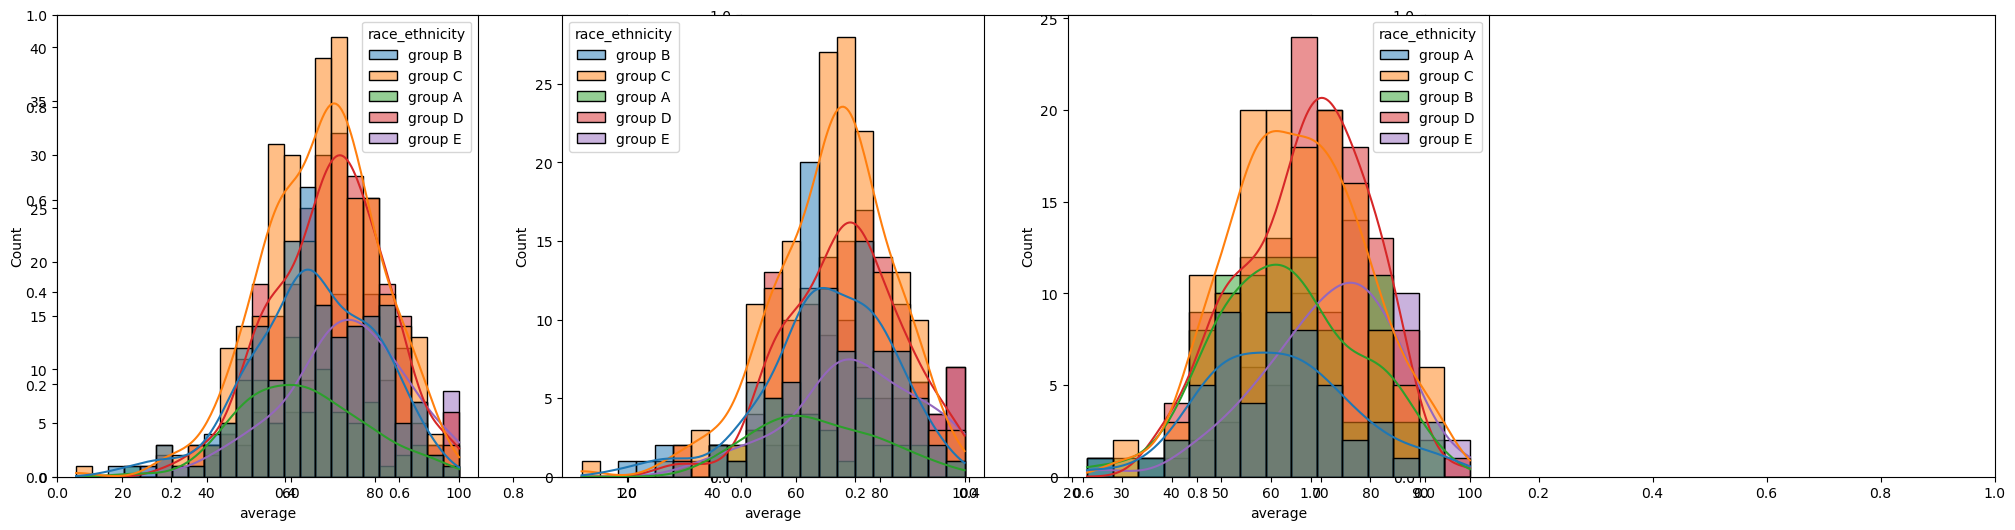

In [39]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

In [40]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

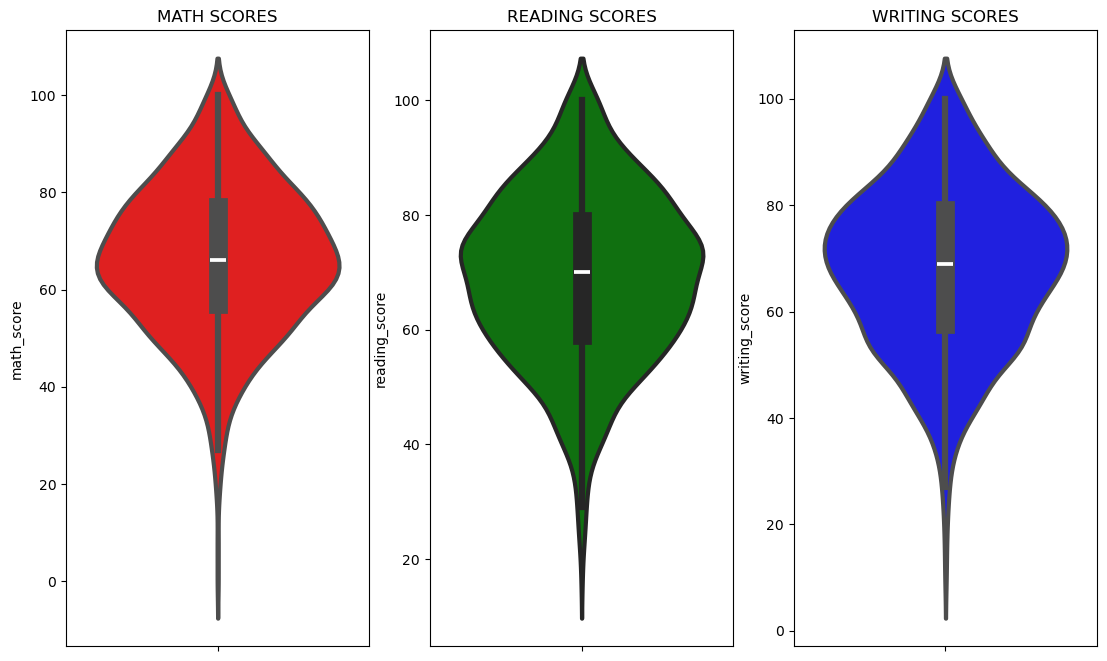

In [41]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

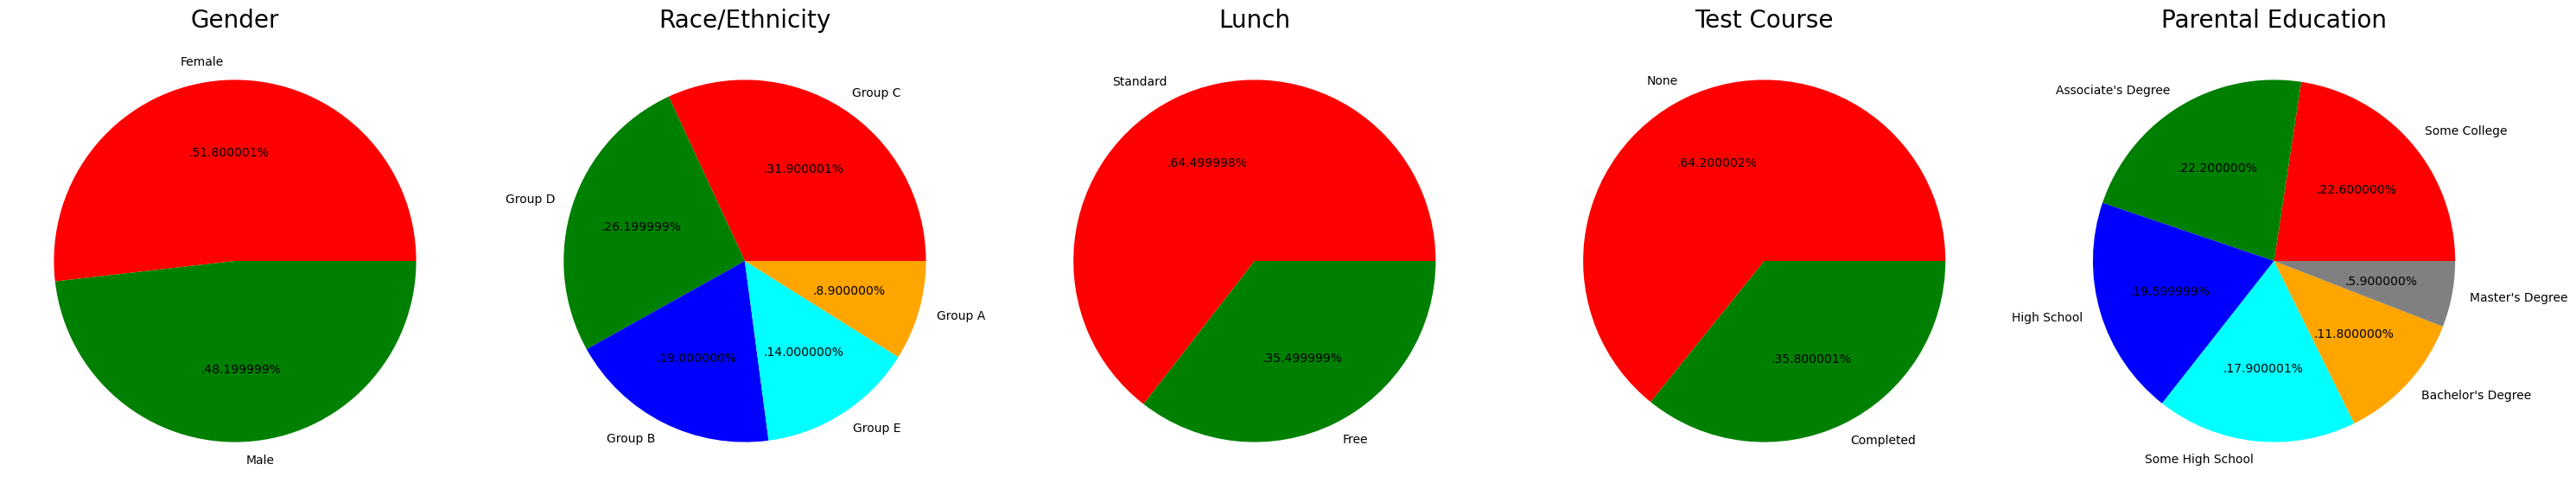

In [42]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

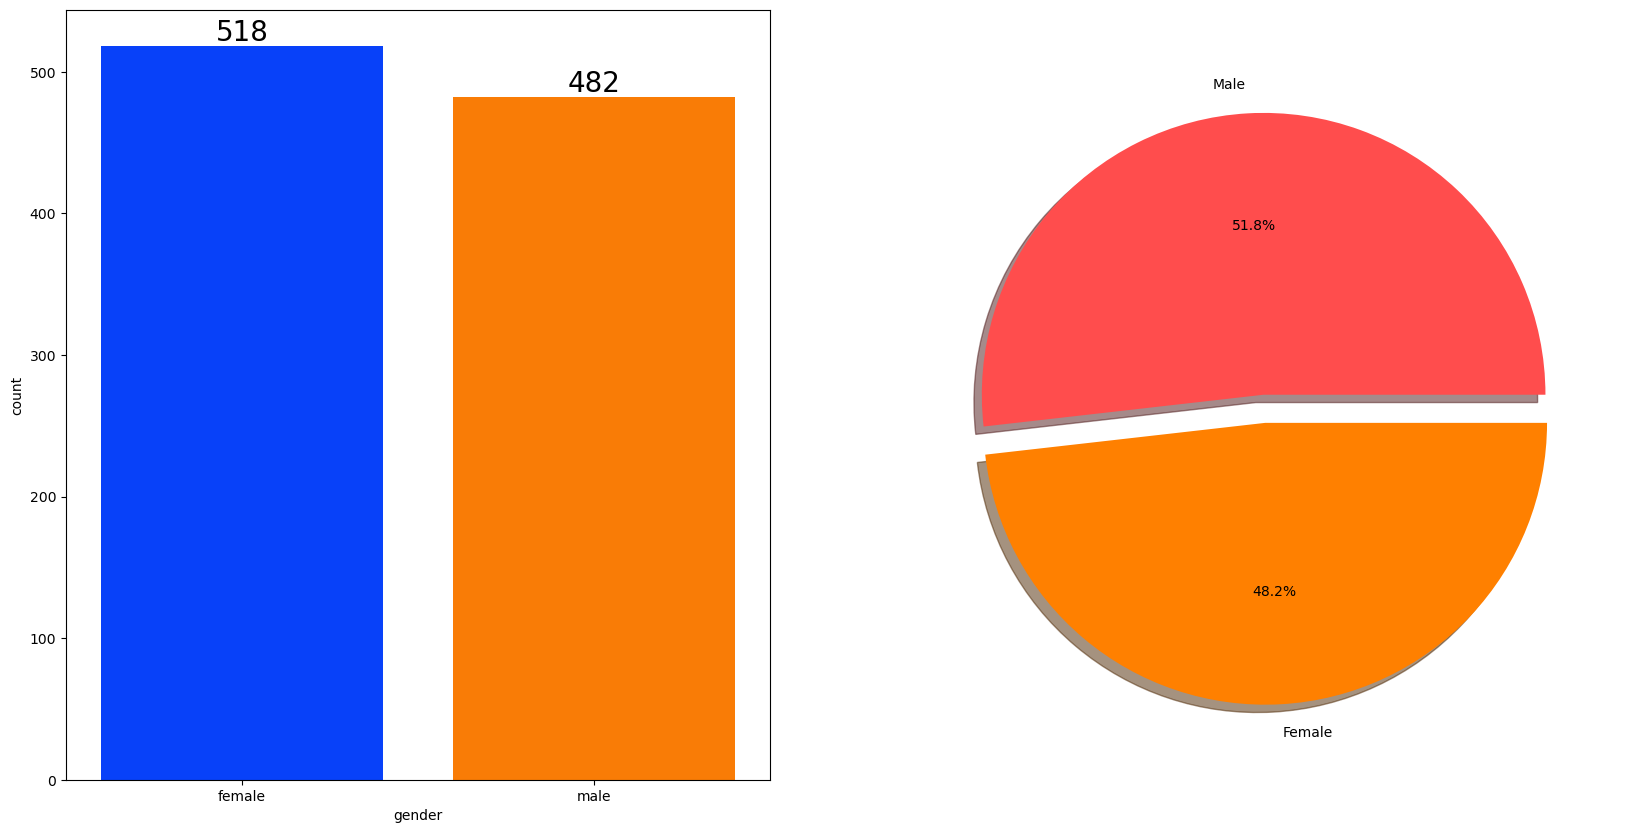

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [44]:
gender_group = df.groupby('gender')[df.select_dtypes(include='number').columns].mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


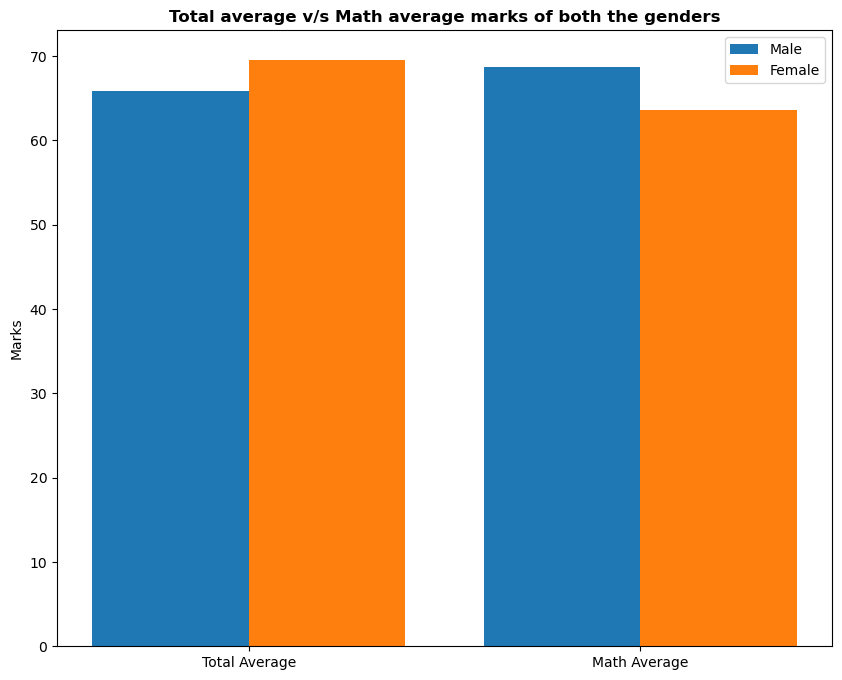

In [45]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

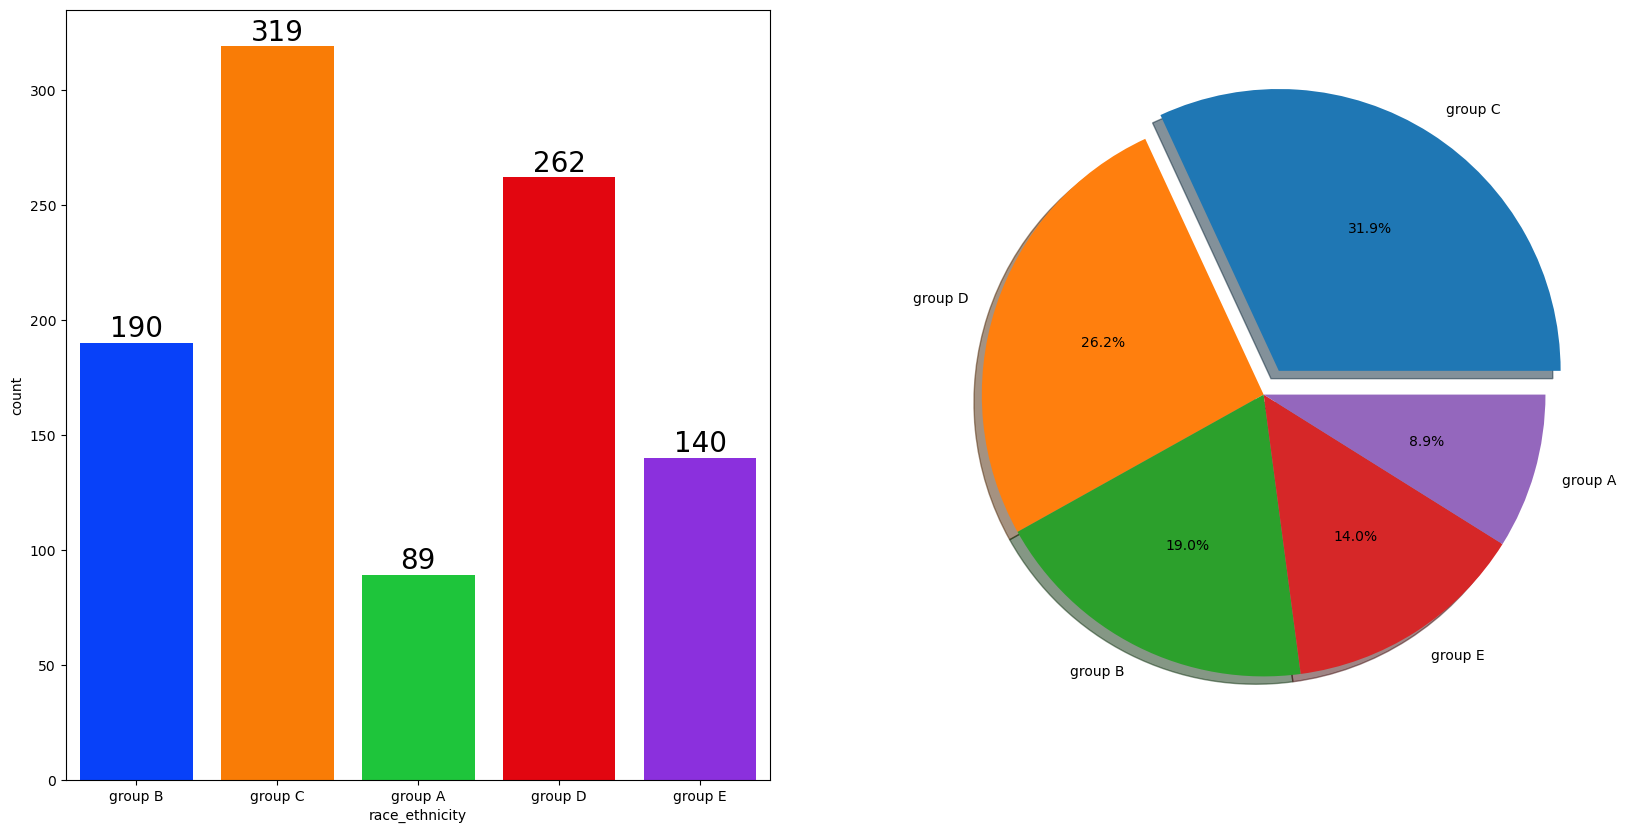

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [47]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

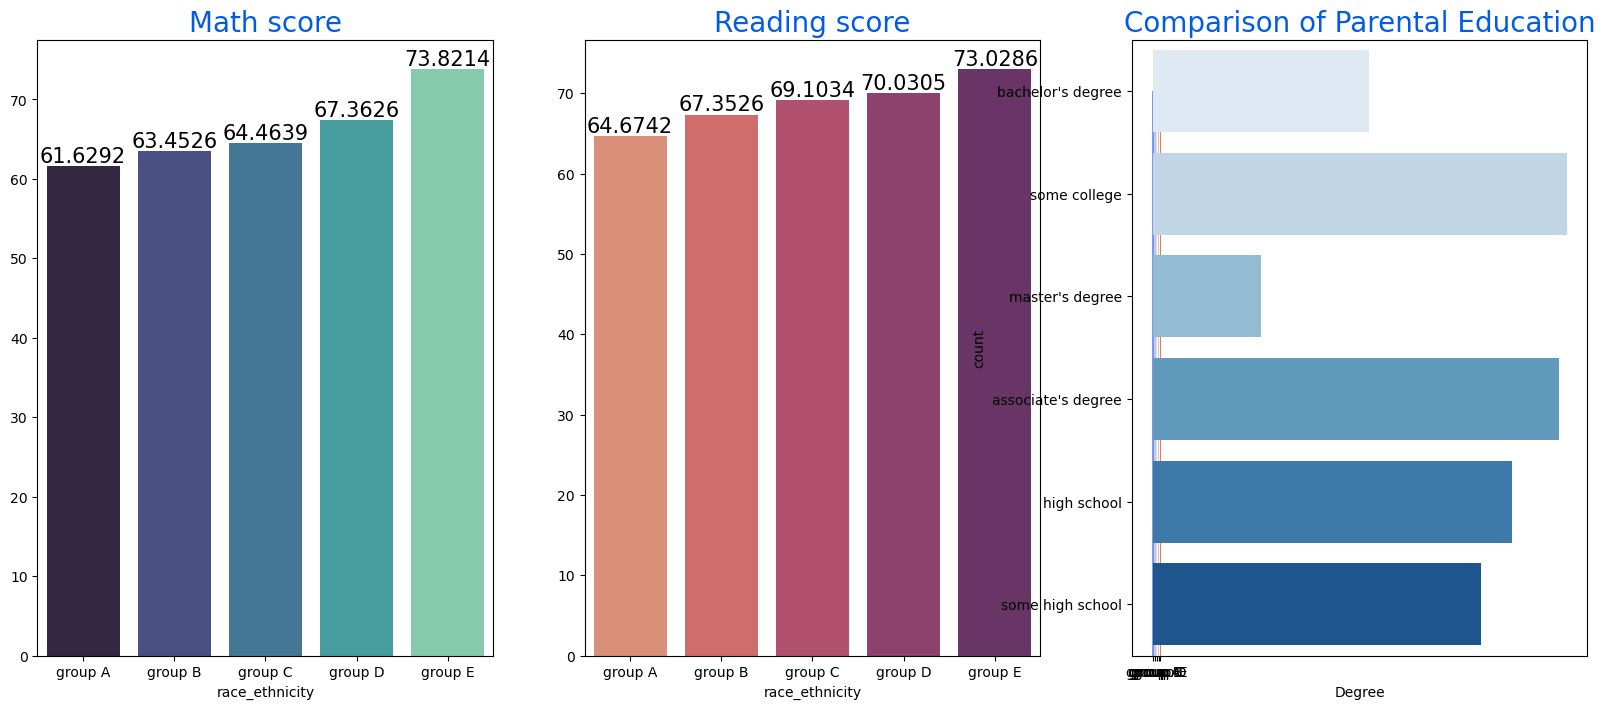

In [48]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

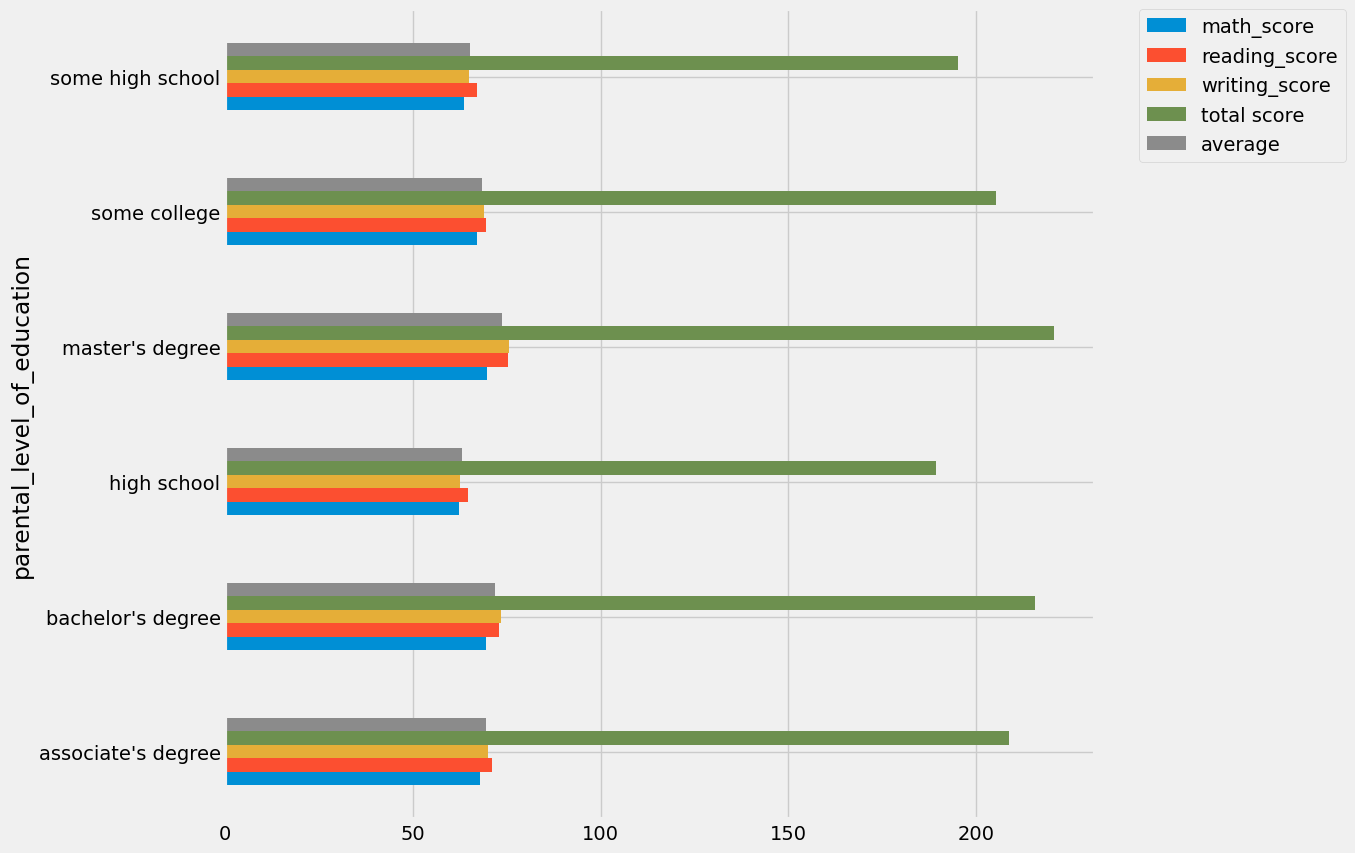

In [49]:
df.groupby('parental_level_of_education')[df.select_dtypes(include='number').columns].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

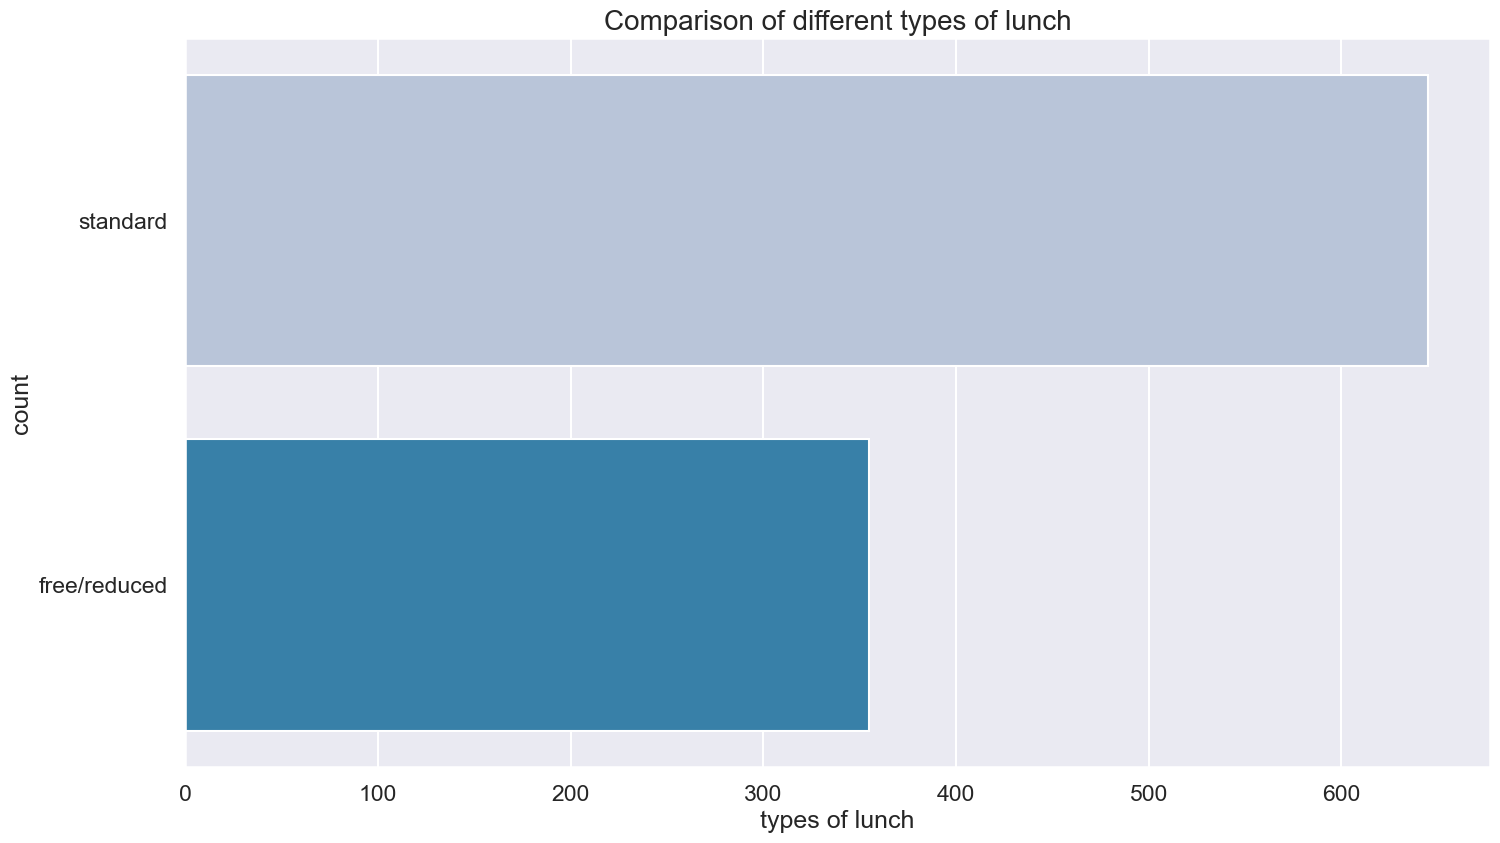

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_theme(style='darkgrid', context='talk') 
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

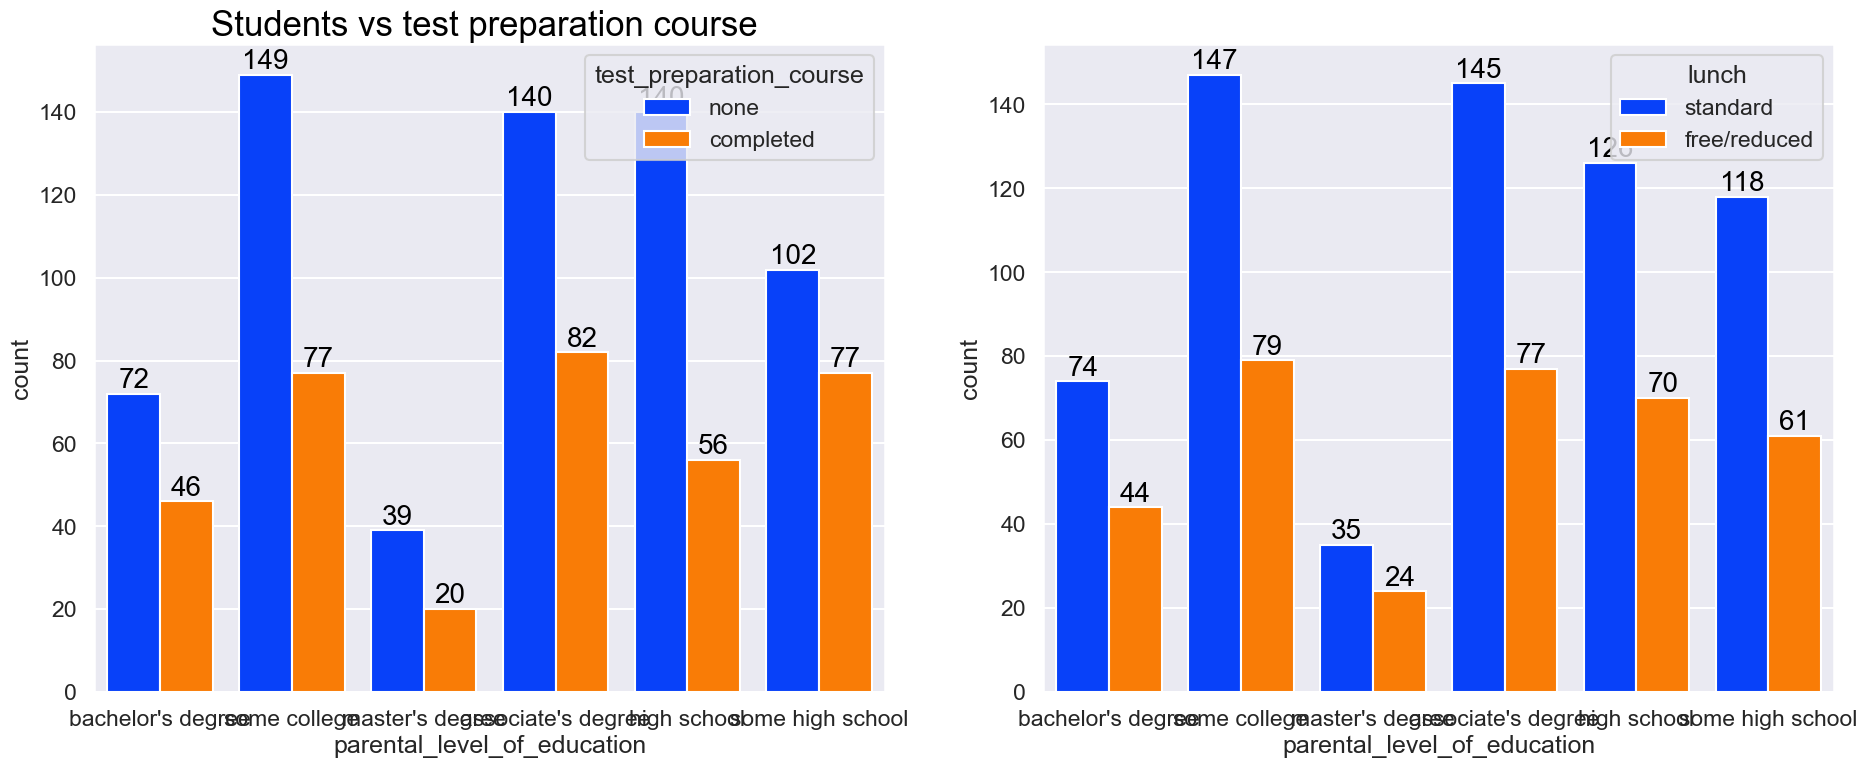

In [51]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

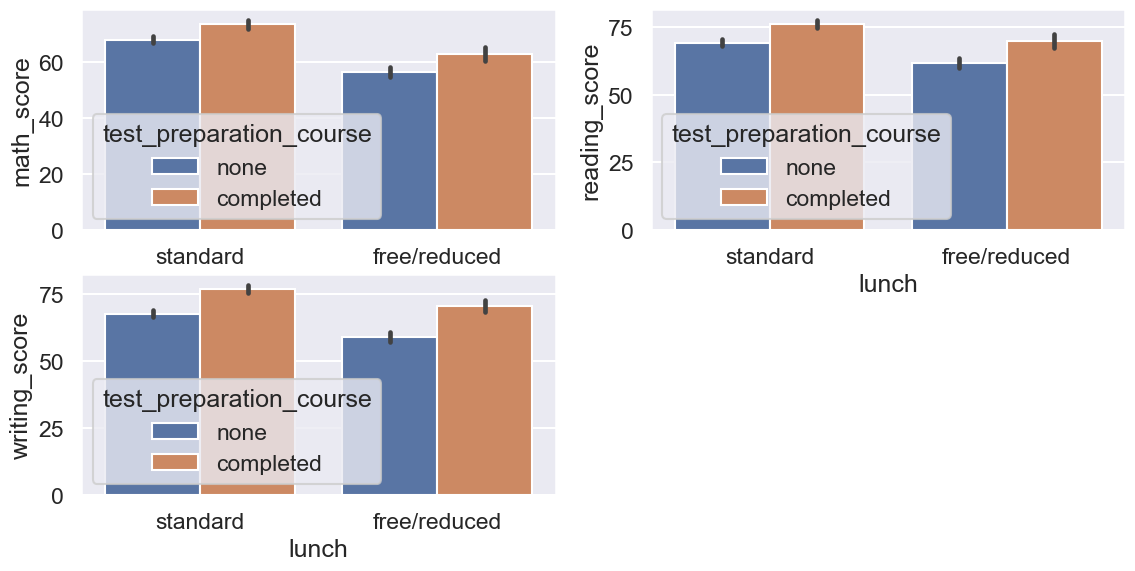

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

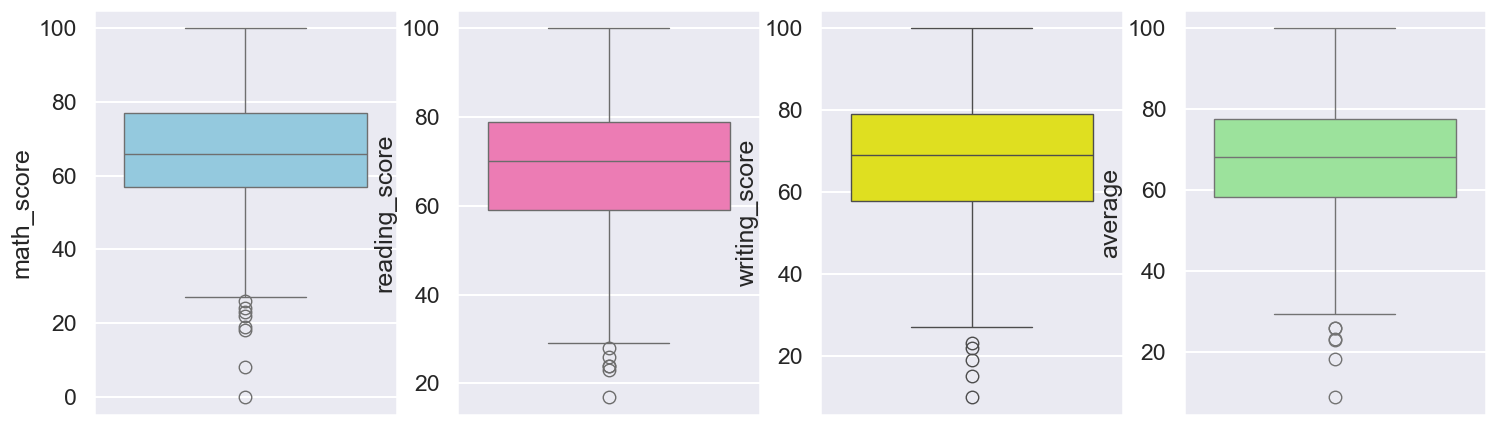

In [53]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

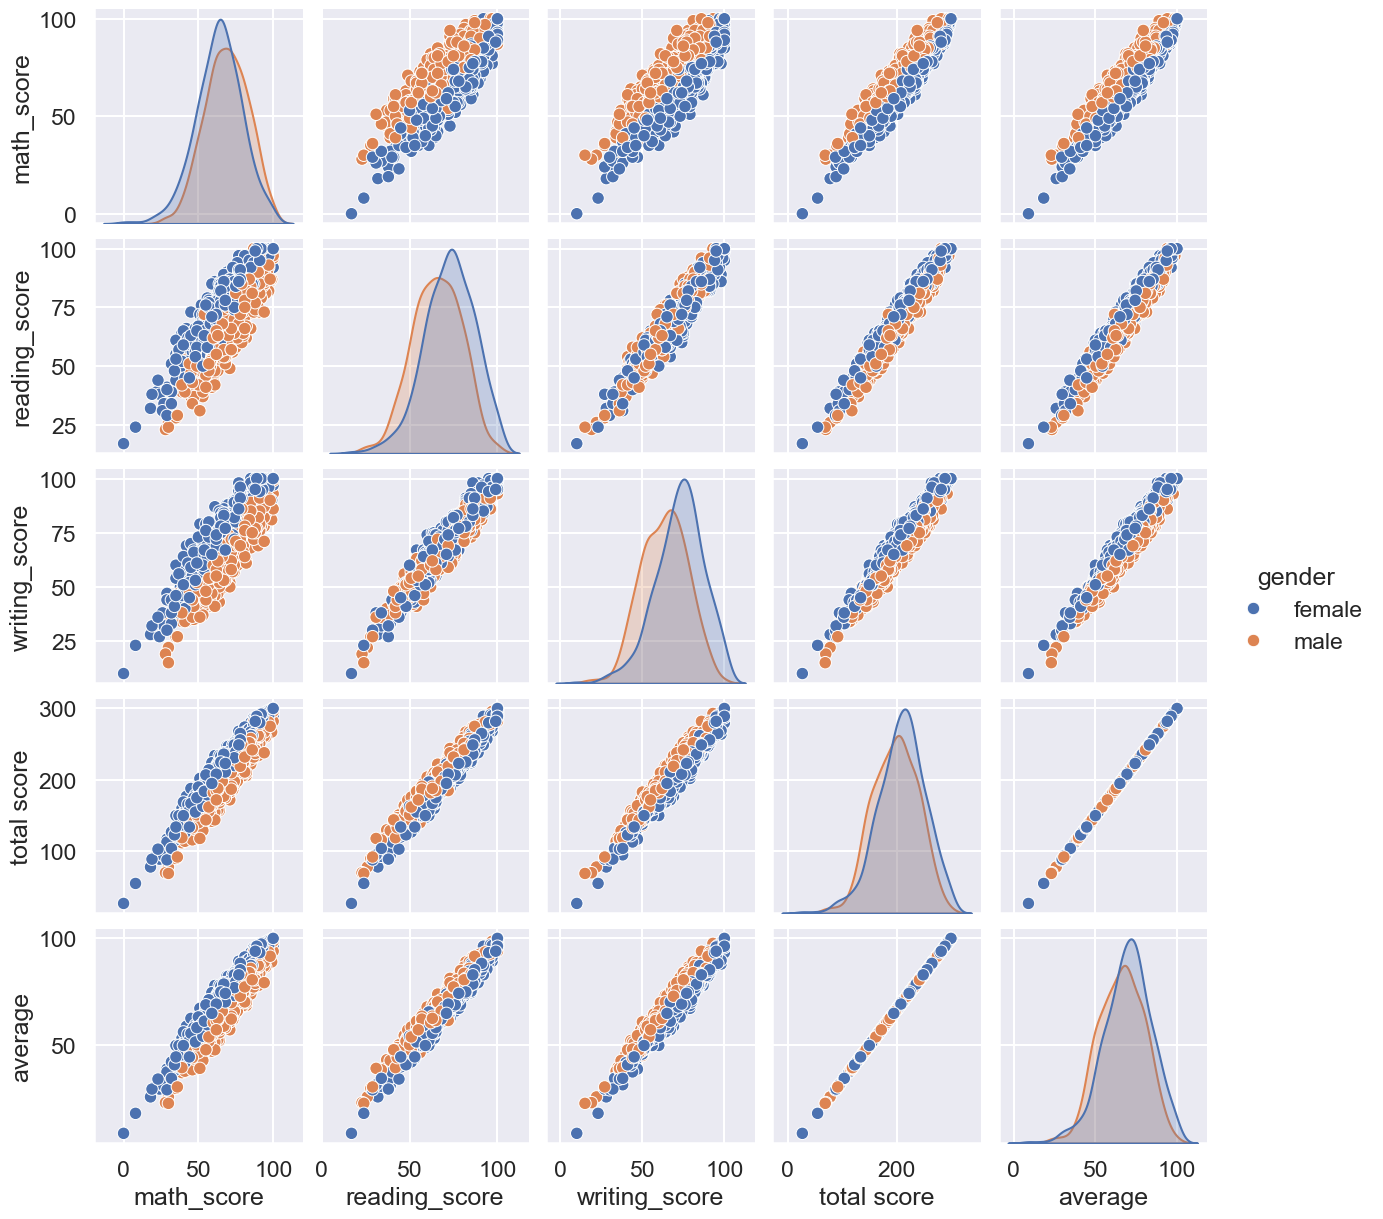

In [54]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

# _______________________________________ Model building ______________________

# Select Features (X) and Target (y)

## Pick relevant numeric and categorical features likely to affect cost:


In [33]:
X = df[[
    'Distance_km', 'Duration_days', 'Elevation_gain_m', 'Max_altitude_m',
    'Guide_cost_rupees', 'Permit_fee_rupees', 'Local_cost_index',
    'Group_size', 'accommodation_rating', 'Hotel_Price_per_day'
]]

y = df['trek_total_cost(rupees)']


## Train-Test Split

In [35]:
pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_10_9_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp310-cp310-macosx_10_13_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp310-cp310-macosx_10_9_x86_64.whl (9.3 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached scipy-1.15.3-cp310-cp310-macosx_10_13_x86_64.whl (38.7 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Evaluate the Model

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 9388.632911940798
RMSE: 10965.74682570121
R² Score: -0.04656850373157195


## Coefficients (Feature Impact)

In [39]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)

                Feature  Coefficient
6      Local_cost_index  1116.507971
8  accommodation_rating   602.860303
1         Duration_days   204.442334
2      Elevation_gain_m     1.980867
4     Guide_cost_rupees     0.512140
9   Hotel_Price_per_day     0.227956
3        Max_altitude_m    -0.890285
5     Permit_fee_rupees    -1.385670
0           Distance_km   -11.265420
7            Group_size  -146.966714
